<a href="https://colab.research.google.com/github/duanasq/learning-ds-public/blob/main/block_dei_display.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Visualising representation of genders in tech from Block's public data

See: https://squareup.com/us/en/about/diversity/archive

Datasource: Data was crafted by hand by scraping the following URLs
- https://squareup.com/us/en/about/diversity/workforce-data-2021
- https://squareup.com/us/en/about/diversity/archive/workforce-data-2020
- 2018 is missing
- https://squareup.com/us/en/about/diversity/archive/workforce-data-2019
- https://squareup.com/us/en/about/diversity/archive/workforce-data-2017



In [9]:
import numpy as np
import pandas as pd
import json
import matplotlib
import matplotlib.pyplot as plt

In [5]:
df_tech = pd.DataFrame({
    "report_year": ["2017", "2018", "2019", "2020", "2021"],
    "non_binary" : [np.nan, np.nan, np.nan, 0.002, 0.003],
    "women": [0.188, np.nan, 0.229, 0.232, 0.258],
    "men": [0.812, np.nan, 0.771, 0.765, 0.739]
})
df_tech

,report_year,non_binary,women,men
0,2017,NaN,0.188,0.812
1,2018,NaN,NaN,NaN
2,2019,NaN,0.229,0.771
3,2020,0.002,0.232,0.765
4,2021,0.003,0.258,0.739


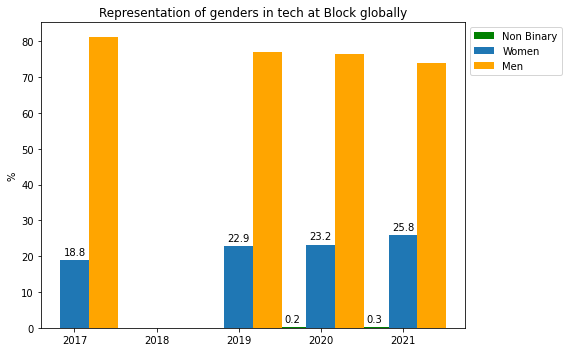

In [25]:
labels = list(df_tech['report_year'])
labels = list(map(str, labels))

women_percentages = df_tech["women"].values * 100
non_binary_percentages = df_tech["non_binary"].values * 100
men_percentages = df_tech["men"].values * 100

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=[8, 5])
rects1 = ax.bar(x - width, non_binary_percentages, width=width, label='Non Binary', color='green')
rects2 = ax.bar(x, women_percentages, width=width, label='Women', color='tab:blue')
rects3 = ax.bar(x + width, men_percentages, width=width, label='Men', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('%')
ax.set_title('Representation of genders in tech at Block globally')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor=(1, 1))

if(matplotlib.__version__ >= "3.4.0"):
  ax.bar_label(rects1, padding=3)
  ax.bar_label(rects2, padding=3)
else:
  def autolabel(rects):
      """Attach a text label above each bar in *rects*, displaying its height."""
      for rect in rects:
          height = rect.get_height()
          ax.annotate("{:.1f}".format(height),
                      xy=(rect.get_x() + rect.get_width() / 2, height),
                      xytext=(0, 3),  # 3 points vertical offset
                      textcoords="offset points",
                      ha='center', va='bottom')


  autolabel(rects1)
  autolabel(rects2)

fig.tight_layout()

In [27]:
# print scatter plot of (x, y)

women_percentages.filter(lambda val: val != NaN)

AttributeError: ignored

(0.0, 6.0)

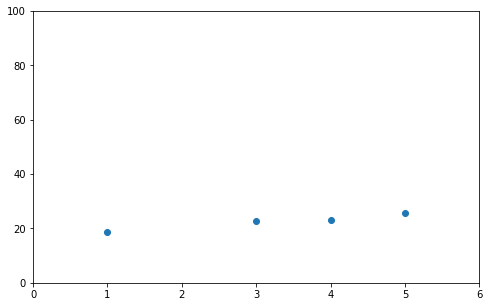

In [83]:
import statsmodels.api as sm

x = np.array([1,3,4,5]).reshape(-1,1)

y = np.array([18.8,22.9,23.2,25.8])

fig, ax = plt.subplots(figsize=[8, 5])
ax.scatter(x,y)
ax.set_ylim(0,100)
ax.set_xlim(0,6)



In [84]:
x_with_const = sm.add_constant(x)
model = sm.OLS(y, x_with_const)
results = model.fit()
print(results.summary())
print(results.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     48.42
Date:                Sun, 17 Apr 2022   Prob (F-statistic):             0.0200
Time:                        10:29:35   Log-Likelihood:                -2.8951
No. Observations:                   4   AIC:                             9.790
Df Residuals:                       2   BIC:                             8.563
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.2800      0.852     20.285      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


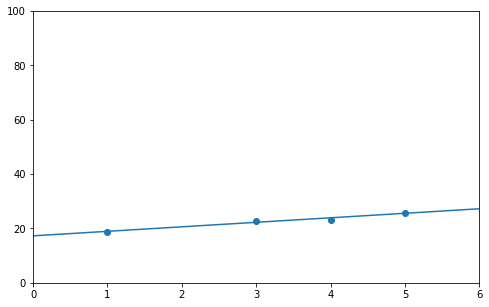

In [85]:
x2 = np.linspace(0, 6, 7)
y2 = x2 * results.params[1] + results.params[0] 

fig, ax = plt.subplots(figsize=[8, 5])
ax.scatter(x,y)
ax.set(xlim=(0, 6), xticks=np.arange(7),
       ylim=(0, 100))
ax.plot(x2, y2)
plt.show()

In [80]:
(50-25.8)/1.66

14.578313253012048

In [87]:
0*18.8+2*22.9+3*23.2+4*25.8

218.6

In [91]:
(218.6 - 9*90.7/4) / (29-81/4)


1.6599999999999975

In [92]:
90.7/4 - 9*1.66/4

18.94